In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import os
from sklearn.metrics import roc_curve, auc

### We choose random forest as the model for implementation since the accuracy for random forest on validation dataset is found to be highest<br>Although the accuracy is one factor for choosing the model, Random Forest has other advantages like,
1. Random Forest is based on the bagging algorithm and uses Ensemble Learning technique. It creates as many trees on the subset of the data and combines the output of all the trees. In this way it reduces overfitting problem in decision trees and also reduces the variance and therefore improves the accuracy of our prediction. Moreover, we have max_leaf_nodes parameter which helps in reducing overfitting.

2. Random Forest works well with both categorical and continuous variables.

3. Random Forest can automatically handle missing values.

4. No feature scaling required: No feature scaling (standardization and normalization) required in case of Random Forest as it uses rule based approach instead of distance calculation. As there is no mathematic equation involved (like multiple linear regression), it is not an issue when the predictors are in different scale. 

5. Handles non-linear parameters efficiently: Non linear parameters don't affect the performance of a Random Forest unlike curve based algorithms. So, if there is high non-linearity between the independent variables, Random Forest may outperform as compared to other curve based algorithms.

6. Random Forest is usually robust to outliers and can handle them automatically.

7. Random Forest algorithm is very stable. Even if a new data point is introduced in the dataset, the overall algorithm is not affected much since the new data may impact one tree, but it is very hard for it to impact all the trees.

8. Random Forest is comparatively less impacted by noise.

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
count_no_sick = len(df[df.target == 0])

count_sick = len(df[df.target == 1])

print("Percentage of patients without Heart disease: {:.2f}%".format((count_no_sick / (len(df.target))*100)))

print("Percentage of patients with Heart disease: {:.2f}%".format((count_sick / (len(df.target))*100)))

Percentage of patients without Heart disease: 45.54%
Percentage of patients with Heart disease: 54.46%


In [5]:
count_female = len(df[df.sex == 0])

count_male = len(df[df.sex == 1])

print("Percentage of Female: {:.2f}%".format((count_female / (len(df.sex))*100)))

print("Percentage of Male: {:.2f}%".format((count_male / (len(df.sex))*100)))

Percentage of Female: 31.68%
Percentage of Male: 68.32%


In [6]:
cp = pd.get_dummies(df['cp'], prefix = "cp") #pd.get_dummies turns our data into binary vectors, 
#sklearn also has classes which an carry out one hot encoding but pd.get_dummies keeps the code precise
thal = pd.get_dummies(df['thal'], prefix = "thal")
slope = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, cp, thal, slope]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [7]:
df = df.drop(columns =['cp','thal','slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [8]:
y = df.target.values 
x_data = df.drop(['target'], axis = 1)


x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values #normalising data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state = 2)
rf.fit(x_train.T, y_train.T)

print("Random Forest Accuracy Score : {:.2f}%".format(rf.score(x_test.T,y_test.T)*100))

Random Forest Accuracy Score : 88.52%


In [10]:
y_predict = rf.predict(x_test.T)
print(y_predict)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1]


[[23  4]
 [ 3 31]]


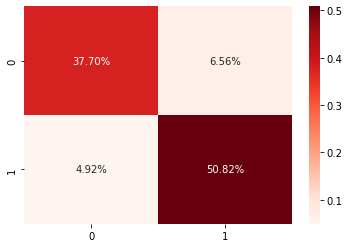

Accuracy is:  88.52459016393442


In [11]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", cmap = 'Reds')

print(cm)

plt.show()
ac = accuracy_score(y_test, y_predict)
print('Accuracy is: ', ac*100)

### Here we fit the training sets on the random forest classifier and then we run the 'predict' command on validation dataset. The accuracy we get here is 88.52%. But with variation, we will see that we get even more accurate model. The false negative percentage will be lowered, and true positive percentage will increase. <br>

In [12]:
score_list_RF = []
for i in range(2,25):
    rf2 = RandomForestClassifier(n_estimators = 1000, random_state = 2, max_leaf_nodes = i)
    rf2.fit(x_train.T, y_train.T)
    score_list_RF.append(rf2.score(x_test.T, y_test.T))

### We have set max_leaf_nodes in range 2 to 25. It sets a limit on the splitting of the node and thus helps to reduce the depth of the tree, and effectively helps in reducing overfitting and reduces error when used on future data.

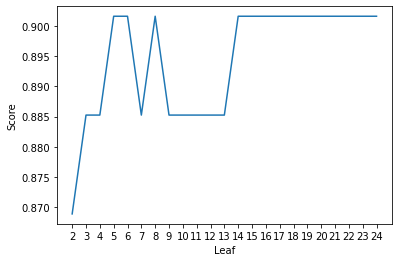

RF Score Max 90.16%


In [13]:
plt.plot(range(2,25), score_list_RF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
print("RF Score Max {:.2f}%".format((max(score_list_RF)) * 100))

In [14]:
y_pred = rf.predict(x_test.T)
print(y_pred)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [19]:
rf2 = RandomForestClassifier(n_estimators = 1000, random_state = 2, max_leaf_nodes = 5)
rf2.fit(x_train.T, y_train.T)
score_list_RF.append(rf2.score(x_test.T, y_test.T))
y_pred = rf2.predict(x_test.T)
cm_max = confusion_matrix(y_test.T, y_pred)
print(cm_max)

[[23  4]
 [ 2 32]]


### From above graph we can see that the maximum accuracy is achieved for certian numeber of 'maximum leaf nodes' . The node at which the highest accuracy is achieved changes when random state is changed, but the highest accuracy stays the same which is 90.16% <br><br>Therefore the confusion matrix of the the highest accuracy score for random forest is given below. 

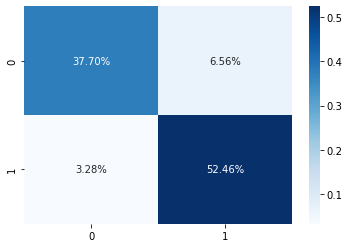

Accuracy is:  90.1639344262295


In [16]:
cm_max = confusion_matrix(y_test.T, y_pred)
sns.heatmap(cm_max/np.sum(cm_max), annot=True, fmt=".2%", cmap = 'Blues')

plt.show()
ac = accuracy_score(y_test, y_pred)
print('Accuracy is: ', ac*100)

### Utilized seaborn to create a heat map of the confusion matrix percentages which helps us for a good Data Visualization, as it gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made. <br><br>For instance, we can see the model is predicting most of the true cases correctly (52.46%). The most important about this model being selected is that it predicts only 3.28% of patients as no heart disease when they actually have heart disease. This percentage is very low, and very crucial in any clinical setting where there is a diagnosis for any disease. <br>


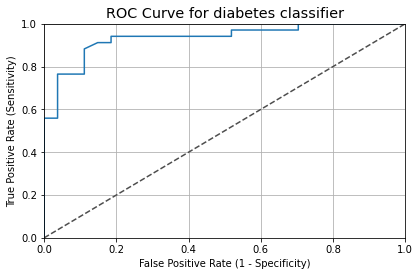

In [17]:
y_pred_quant = rf.predict_proba(x_test.T)[:, 1]
FPR, TPR, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(FPR, TPR)
ax.plot([0, 1], [0, 1], transform = ax.transAxes, ls = "--", c = ".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.tight_layout()

In [18]:
auc(FPR, TPR)

0.9340958605664488

### The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model is at distinguishing between the positive and negative classes. Here the model AUC is 0.93, which shows that the model is performing well.